# inter-chrom interaction
## CLI mode
`conf-hicmap_1.yml`

```yaml
trackc:
  - ax: t1
    height: 2
    track_type: hicmap
    track_para:
      mat:
        method: extractContactRegions
        clr: /path/GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/5120000
        row_regions: 
          - chr6
          - chr8
      mapC:
        cmap: plasma
```

```shell
trackc cli conf-hicmap_1.yml -s 4,1 -o chr6_chr8.pdf
```

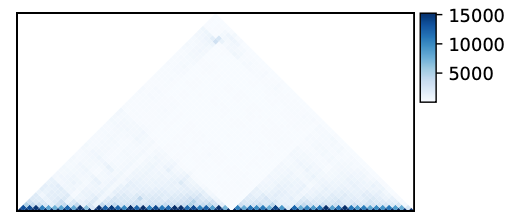

## API mode

In [30]:
import cooler
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

import trackc as tc

fruitpunch3 = LinearSegmentedColormap.from_list(
    "fruitpunch3", [(0, "white"), (0.2, "r"), (1, "#0E3858")], N=100
)

In [31]:
clr = cooler.Cooler(
    "/Users/yuanzan/Documents/RD/GSM4417639_SK-N-DZ_C6BC81F2_b38d5.mcool::/resolutions/5120000"
)
clr.chromsizes

name
chr1     248956422
chr2     242193529
chr3     198295559
chr4     190214555
chr5     181538259
chr6     170805979
chr7     159345973
chr8     145138636
chr9     138394717
chr10    133797422
chr11    135086622
chr12    133275309
chr13    114364328
chr14    107043718
chr15    101991189
chr16     90338345
chr17     83257441
chr18     80373285
chr19     58617616
chr20     64444167
chr21     46709983
chr22     50818468
chrX     156040895
chrY      57227415
chrM         16569
Name: length, dtype: int32

no max min range
maxrange: 15245.0 minrange: 28.0


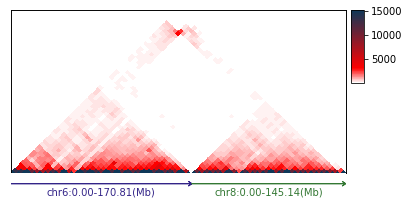

In [32]:
ten = tc.tenon(figsize=(6, 1))
ten.add(pos="bottom", height=3)
ten.add(pos="bottom", height=0.4)

regions = ["chr6:0-170805979", "chr8:0-145138636"]
mat = tc.tl.extractContactRegions(
    clr=clr,
    row_regions=regions,
)

tc.pl.mapC(ax=ten.axs(0), mat=mat.cmat, map_type="tri", cmap=fruitpunch3)
tc.pl.multi_scale_track(
    ten.axs(1),
    regions=regions,
    scale_adjust="Mb",
    intervals=1,
    tick_rotation=0,
    tick_fontsize=10,
)

# tc.savefig('inter-chrom.pdf')